In [1]:
from MLDA.imports.DA_modules import *

# 0. Loading Data, First Look and Choose Categorical/Numerical columns

In [2]:
# read the data
# data_input = pd.read_excel('/home/jesper/Work/MLDA_app/MLDA/input_data/ENB2012_data.xlsx')
data_input = pd.read_csv('/home/jesper/Work/MLDA_app/MLDA/input_data/iris.csv')
data_input.head(40)

# column names
for column in data_input.columns:
    print(column)
    
# If no 'column names' or 'wrong names' in data_input, changes these

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


sepal_length
sepal_width
petal_length
petal_width
species


## 0.1 Choosing the relevant variables

In [3]:
data_input.head() # Columns to choose from
choose_var = [0,1,2,3,4,] # First column: 0
data = data_input.iloc[:, choose_var]
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 0.2 Separating data in cat/num classes and x/y classes, and a combination of these

In [4]:
# Pick column numbers from data, NOT from data_input, first column is 0 (zero)
categoric_x = []
numeric_x = [0,1,2,3,]
categoric_y = [4]
numeric_y = []

################ Calc below ###############
input_classes = {} # init a dict
x = categoric_x + numeric_x
y = categoric_y + numeric_y
categoric = categoric_x + categoric_y
numeric = numeric_x + numeric_y

# Adding to the dict
input_classes['cx'] = categoric_x
input_classes['nx'] = numeric_x
input_classes['x'] = x
input_classes['cy'] = categoric_y
input_classes['ny'] = numeric_y
input_classes['y'] = y
input_classes['c'] = categoric
input_classes['n'] = numeric
categoric

[4]

### 0.2.1 Convert the categorical data dtype to 'category' 

In [5]:
for entry in categoric:
    data.iloc[:, entry] = data.iloc[:, entry].astype("category")

In [6]:
# Checking that the data are of the correct dtype
# data['Item_Fat_Content'].dtype.name

### 0.2.2 Creating new names based on the variable's entity - i.e is it x, y and is it categorical or numerical

In [7]:
# Store the original column names and order
col_orig = data.columns

# Creating new names based on x, y and categoric, numeric
col_xc = ['xc'+str(num+1) for num, item in enumerate(input_classes['cx'])] # the item part is not used
col_xn = ['xn'+str(num+1) for num, item in enumerate(input_classes['nx'])] 
col_yc = ['yc'+str(num+1) for num, item in enumerate(input_classes['cy'])] 
col_yn = ['yn'+str(num+1) for num, item in enumerate(input_classes['ny'])] 
col_xy = col_xc + col_xn + col_yc + col_yn

print('col_orig:' ,col_orig)
print('x+y:', x+y)
print('col_xy:' ,col_xy)

# Transferring the right (original) ordering of the variables to the new names (x, y)
order_orig =[]

for order, item in enumerate(x+y):
    print(order, item)

# The Approach for the loop below:
# for each item in our new-name-list (col_xy) we find the original place/order of that item
# by looping through each number in the 'x+y'-list. The number in the 'x+y'-list is the 
# original order of the items in the new-name-list (col_xy). By picking that number - for example
# say 0, which say is in the 5'th place, we know by looking in col_xy at 5'th place that this item
# was original the first one. We then append this item as the first one to the list: order_orig.
# Then we pick number two, which is 1, etc

# we loop through each number from 0 to total number of columns, len(x+y)
for num in range(len(x+y)):
    # So we find 0 first...
    for order, item in enumerate(x+y):
        # pick 0 in list: x+y: let's say it is in the 5th place
        if item == num:
            # then in col_xy in the 5th place we know that this item was orig the first one 
            order_orig.append(col_xy[order])

# we restore the original order by replacing col_xy with order_orig
col_xy = order_orig

data

col_orig: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
x+y: [0, 1, 2, 3, 4]
col_xy: ['xn1', 'xn2', 'xn3', 'xn4', 'yc1']
0 0
1 1
2 2
3 3
4 4


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 1. Data Munging

## 1.1 Getting an Overview
__Conclusion based on cell below:__ <br>
1) write... <br>
2) write... <br>

In [8]:
# Check the percentage of missing values (NaN values) for each parameter
data.isnull().sum()/len(data)*100
# Conclusion: Item_weight and Outlet_size has missing values: 17% and 28 %, respevtively

data.describe()
data.info()

for column in data.columns:
    data[column].value_counts()

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal_width, dtype: int64

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal_length, dtype: int64

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## 1.2 Munging the relevant columns

Here we munge the 2 columns: Item_Fat_Content and Item_Visibility

In [9]:
# data.isnull().sum()/len(data)*100

# # Item_Visibility: we make the zeroes to NaN
# data.loc[:, 'Item_Visibility'].mean()
# data.loc[:, 'Item_Visibility'] = data.loc[:, 'Item_Visibility'].replace(0.000000, np.nan)
# mean_item_vis = data.loc[:, 'Item_Visibility'].mean() # Now mean value has changed
# data.loc[:, 'Item_Visibility'].mean()

# # Item_Fat_content: we make the LF to Low Fat etc, so that we only have Low Fat and Regular
# data.loc[:'Item_Fat_Content'] = data.loc[:'Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat', 'reg': 'Regular'})

# # And we drop the folowing columns
# # train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year','Outlet_Location_Type'], axis=1, inplace=True)
# data.isnull().sum()/len(data)*100


# # Results
# data.head(40)
# data.info()

# for column in data.columns:
#     data[column].value_counts()

## 1.3 Ordinal data --> numeric data

If we have any ordinal data in our categorical group we have to transform it into numbers, and move it to the numerical group.

__Ordinal data:__ Outlet_Size <br>
__Nominal data:__ Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type

In [10]:
# # Ordinal data - Outlet_Size, ref.PML p.113
# data['Outlet_Size']

# size_mapping = {
#                 'Small': 1,
#                 'Medium': 2,
#                 'High': 3
# }

# data['Outlet_Size'] = data.loc[:, ('Outlet_Size')].map(size_mapping)
# data['Outlet_Size']

<br>
<hr>

# 2. Visualizing data / Exploratory Data Analysis (EDA) 

## 2.1 Start by Naming variables - original column names or x1, x2.., y1, y2.? Choose

Now before we display all our data we have the option to choose between 2 different namings of our variables. I.e. the long original name, or xc, xn, for categorial or numerical features, respectively.

In [11]:
name_as_x = 'no' # Set this to 'yes' or 'no'

if name_as_x == 'yes':
    data.columns = col_xy
else:
    data.columns = col_orig
# data
col_xy
col_orig

['xn1', 'xn2', 'xn3', 'xn4', 'yc1']

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 2.2 Short naming - we make the option to pick a short name for some of the variables

In [12]:
df_xc = data.iloc[:, input_classes['cx']]
df_xn = data.iloc[:, input_classes['nx']]
df_yn = data.iloc[:, input_classes['ny']]
df_c = data.iloc[:, input_classes['c']]
df_n = data.iloc[:, input_classes['n']]
df_x = data.iloc[:, input_classes['x']]
df_y = data.iloc[:, input_classes['y']]

## 2.3 Generic Plots - plots which are generated automaticly

### 2.3.1 Visualising Numerical Variables

In [13]:
sns.set(style='whitegrid', palette="deep", font_scale=.9, rc={"figure.figsize": [8, 5]})

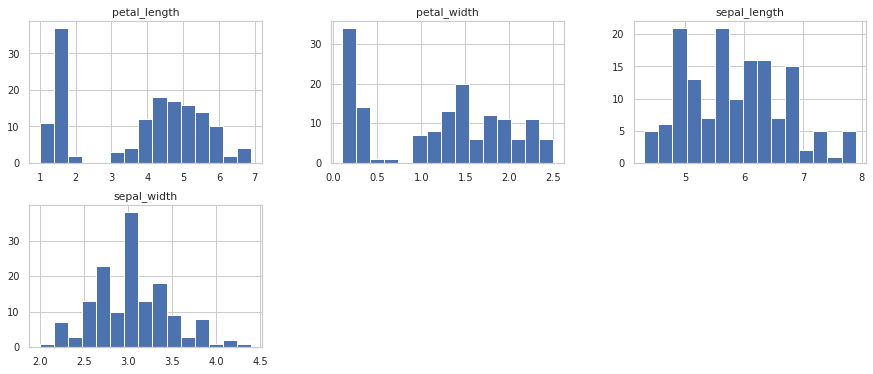

In [14]:
fig_num_rows = math.ceil(len(df_n.columns)/3)

df_n.hist(bins=15, figsize=(15, 6), layout=(fig_num_rows, 3));

### 2.3.2 Visualising Categorical Variables

In [15]:
fig_num_rows = math.ceil(len(df_xc.columns)/3)

fig, ax = plt.subplots(fig_num_rows, 3, figsize=(20, 8))
for var, subplot in zip(df_c.columns, ax.flatten()):
    sns.countplot(df_c[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show();

<Figure size 1440x576 with 0 Axes>

### 2.3.3 Visualising Relationships Between Numerical Variables

In [16]:
# sns.pairplot(data)
def make_plot():
    for var in df_c.columns[:len(df_c.columns)]:
        sns.pairplot(data, hue=var)
    plt.show()
# make_plot()

# Understanding the plot above:
# the plot above for one single var:
# sns.pairplot(data, hue='Outlet_Type')
# so we iterate through all the categorical columns names and use each of the categories as hue's

### 2.3.4 Visualising Relationships Between Numerical and Categorical Variables 

In [17]:
# data.iloc[:, input_classes['y']].columns
# data.iloc[:,input_classes['cx']].columns
data.iloc[:,input_classes['c']].columns
df_c.columns

Index(['species'], dtype='object')

Index(['species'], dtype='object')

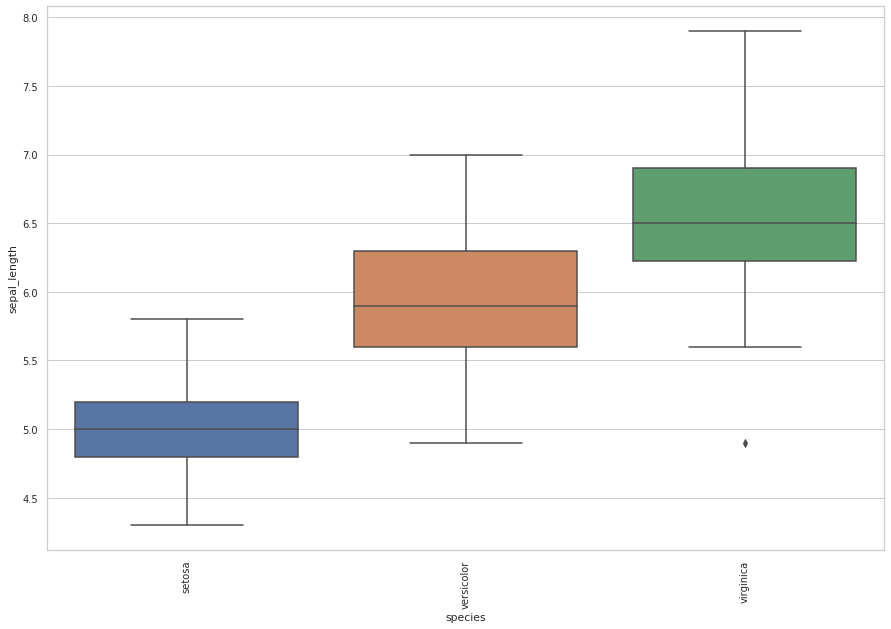

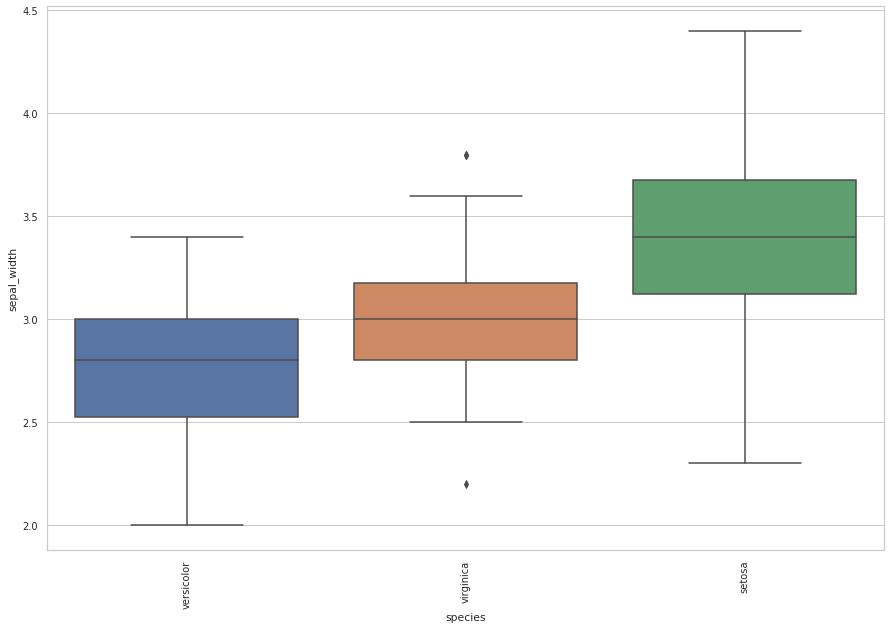

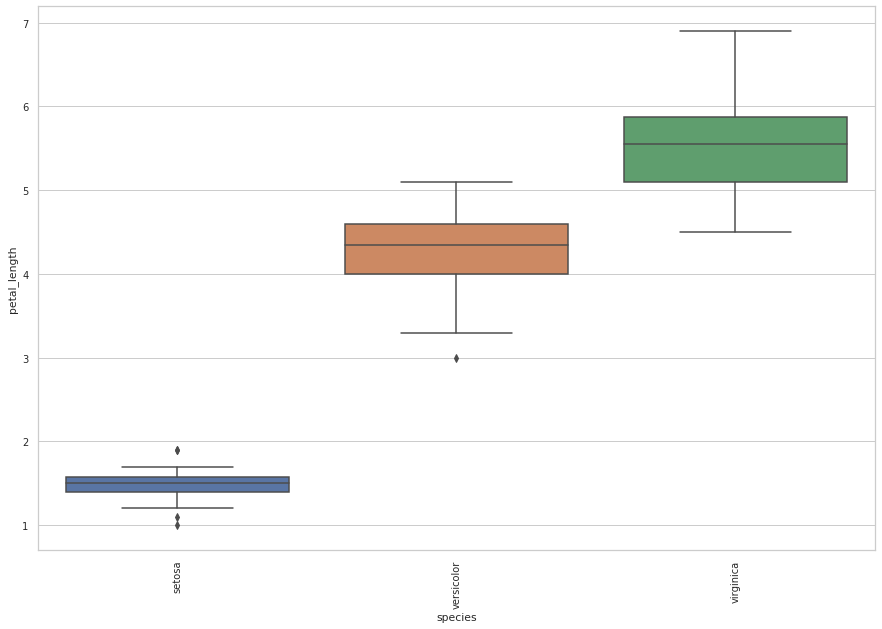

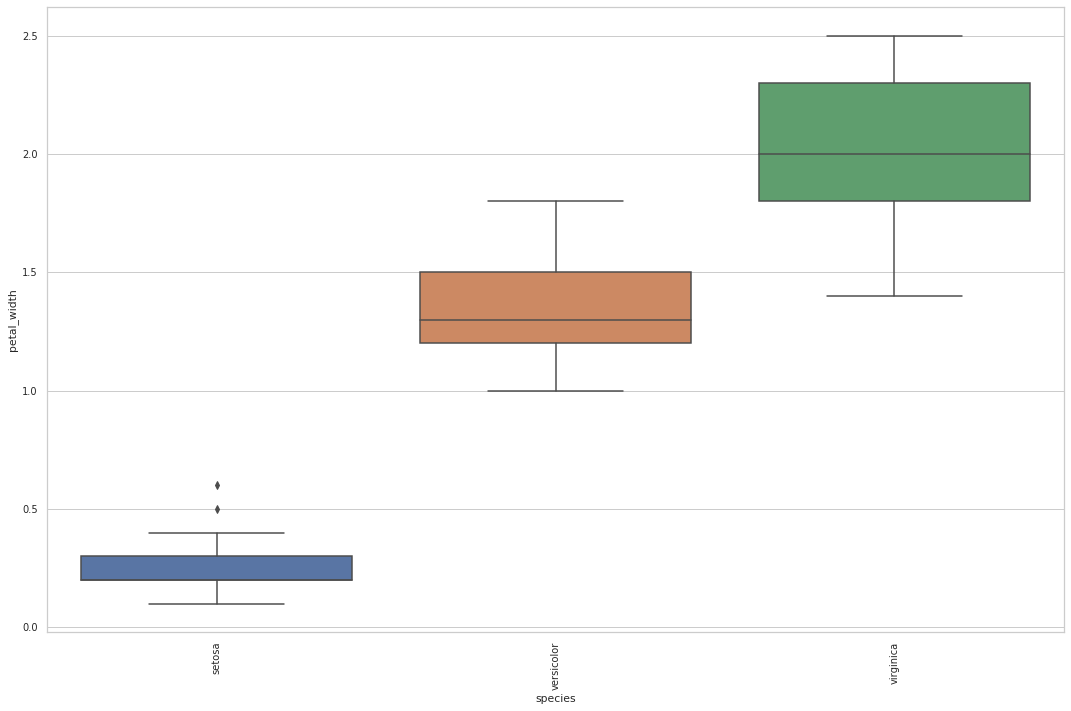

In [18]:
# Boxplot of each of the categorial variables and the numeric variables
# Categorial classes ordered by numeric variable

# Choose either all categorical var vs all numerical var, 
# Or choose only X cat and Y num
# cat=df_c
# num=df_n

def numColumnsInMultiColumns(cat_columns):
    num_cols = [2 if len(cat_columns) == 2 else 3][0]
    return num_cols


def plotCatNumOneColumn(cat, num, data):
    """Plot when we have a single categorical variable. The function makes a new plot for every numerical variable"""
    fig_num_rows = 1  # Since this is for each numerical column
    fig_num_columns = 1  # Since we have only one cat var
    for num_var in num.columns:
        fig, ax = plt.subplots(fig_num_rows, fig_num_columns, figsize=(15, 10))
        # The sorted_ var below we add the name of the cat var as cat.columns.to_list()
        sorted_ = data.groupby(cat.columns.to_list())[num_var].median().sort_values()
        # In the boxplot for x we pass in cat.columns.to_list()[0], since it takes only 1D values
        sns.boxplot(
            x=cat.columns.to_list()[0],
            y=num_var,
            data=data,
            ax=ax,
            order=list(sorted_.index),
        )
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    plt.tight_layout()
    plt.show()


# print(plotCatNumOneColumn(cat=cat, num=num, data=data))


def plotCatNumTwoOrMoreColumns(cat, num, data):
    # The first two optional arguments of pyplot.subplots define the number of rows and columns of the subplot grid.
    fig_num_rows = math.ceil(len(cat.columns) / 3)
    fig_num_columns = numColumnsInMultiColumns(cat.columns)
    for num_var in num.columns:
        fig, ax = plt.subplots(fig_num_rows, fig_num_columns, figsize=(15, 10))
        print(hasattr(ax, "flat"))
        for cat_var, subplot in zip(cat.columns, ax.flatten()):
            sorted_ = data.groupby([cat_var])[num_var].median().sort_values()
            sns.boxplot(
                x=cat_var, y=num_var, data=data, ax=subplot, order=list(sorted_.index)
            )
            for label in subplot.get_xticklabels():
                label.set_rotation(90)
    plt.tight_layout()
    plt.show()


# print(plotCatNumTwoOrMoreColumns(cat=df_c, num=df_n, data=data))

plot_dict = {
    "one column": plotCatNumOneColumn,
    "multi columns": plotCatNumTwoOrMoreColumns,
}


def checkCatandNumBeforePlot(cat, num):
    if len(cat.columns) == 0:
        plot = "No categorical data"
    elif len(num) == 0:
        plot = "No numerical data"
    elif len(cat.columns) == 1:
        # Then we ask plot_dict to give us plotCatNumOneColumn
        plot = plot_dict["one column"]
    elif len(cat.columns) > 1:
        # Then we ask plot_dict to give us plotCatNumMultiColumns
        plot = plot_dict["multi columns"]
    else:
        plot = "Column input error"
    return plot


def plotCatvsNum(cat=df_c, num=df_n, data=data):
    # First we call the function: checkCatandNumBeforePlot to check the len() of the cat and num variables
    plot = checkCatandNumBeforePlot(cat=cat, num=num)
    # If the type of plot is a string we return that string
    if type(plot).__name__ == "str":
        return plot
    else:
        return plot(cat, num, data)


plotCatvsNum(cat=df_c, num=df_n, data=data)


## 2.4 Non-generic plots - plots where you have to choose variable parameters

In [ ]:
# # conditional relationships
# col_orig
# col_xy

# def plotChooseVars():
#     cond_plot = sns.FacetGrid(data=data, col='Item_Type', hue='Outlet_Size', col_wrap=4)
#     cond_plot.map(sns.scatterplot, 'Item_MRP', 'Item_Outlet_Sales');
#     plt.legend(loc='upper right')
#     plt.show()
# plotChooseVars()

<br>
<hr>

# 3. Statistics

In [ ]:
x # features
y # dependent var
data.iloc[:, x] # we see we have text values in our categorical data
df_x.iloc[2]

In [ ]:
# check our data for unique values etc

# Check the percentage of missing values for each parameter
data.isnull().sum()/len(data)*100 # we have 3 columns with missing values 

# Based on the shown data we have 3 columns with some NaN values

data.describe()
data.info()

for column in data.columns:
    data[column].value_counts()

## 3.1 Heatmapping correlation and p-values

### 3.1.1 First we call the correlation function from corr_stats

In [ ]:
from MLDA.corr_stats.corr_heatmap import correlation
c = df_c.columns.to_list() # categorical
n = df_n.columns.to_list() # numerical
corr = correlation(data, catcols=c, numcols=n, CI=.1, method_cc='Asym', method_nn='Spearmann')
corr[0] # correlation values
corr[1] # p values

### 3.1.2 Heatmapping the correlation values

In [ ]:
correlation = corr[0].loc[:, :].replace('p > CI', 0)
correlation = correlation.loc[:, :].fillna(0)

cmap = sns.diverging_palette(275, 150,s=80, l=55, n=9)
g = sns.heatmap(correlation, vmax=.6, center=0, square=True,
               linewidths=.5, cbar_kws={'shrink': .5}, annot=True,
               fmt='.2f', cmap=cmap)
# sns.despine()
g.figure.set_size_inches(14, 10)

# Due to bug in matplotlib 3.1.1
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

# place xticks at the top
g.xaxis.set_ticks_position('top')
# rotate the top text
g.set_xticklabels(g.get_yticklabels(), rotation = 60);
plt.show();

### 3.1.3 Heatmapping the p values

In [ ]:
correlation = corr[1].loc[:, :].fillna(1)

g = sns.heatmap(correlation, vmax=.2, center=0.05, square=True,
               linewidths=.5, cbar_kws={'shrink': .5}, annot=True,
               fmt='.2f', cmap='Greens_r')
# sns.despine()
g.figure.set_size_inches(14, 10)

# Due to bug in matplotlib 3.1.1
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

# place xticks at the top
g.xaxis.set_ticks_position('top')
# rotate the top text
g.set_xticklabels(g.get_yticklabels(), rotation = 60);
plt.show();

# Training our Model